#Set up environment

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.applications import mobilenet_v2

import os

from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
import pandas as pd

import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import random
import shutil

# Define fucntions

In [ ]:
# display 4x4 images
def first_img_visualize(nrows,ncols,path_list):
    fig = plt.figure()
    fig.set_size_inches(ncols*4, nrows*4)

    img_paths =[]
    for path in path_list: 
        list = os.listdir(path)
        img_path = os.path.join(path, list[0])
        img_paths.append(img_path)

    for i, img_path in enumerate(img_paths):
    # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off') # Don't show axes (or gridlines)

        img = mpimg.imread(img_path)
        plt.imshow(img)

    plt.show()

In [ ]:
def first_four_img_visualize(nrows,ncols,list_name):
    fig = plt.figure()
    fig.set_size_inches(ncols*4, nrows*4)

    list_path_train_class = []
    for name in list_name:
        train_class_name = os.path.join(train, name) # Đường dẫn đến class trong train 
        list_path_train_class.append(train_class_name)

    for path in list_path_train_class: 
        file_list = os.listdir(path)
        img_paths =[]
        for index in range(0,3): 
            img_path = os.path.join(path, file_list[index])
            img_paths.append(img_path)
            for e, img_path in enumerate(img_paths):
            # Set up subplot; subplot indices start at 1
                sp = plt.subplot(nrows, ncols, e + 1)
                sp.axis('Off') # Don't show axes (or gridlines)
                img = mpimg.imread(img_path)
                plt.imshow(img)
                e += 1

    plt.show()

In [ ]:
#predict an image
def predict(uploaded):
    for fn in uploaded.keys():
        print(fn)
        img_path = './' + fn

    img        = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array  = image.img_to_array(img)
    img_array  = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    for key, value in val_generator.class_indices.items():
        if value == prediction[0].argmax():
            pred = key

    plt.figure(figsize=(5,5))
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title('Prediction: ' + pred.upper())
    plt.axis('off')
    plt.grid(b=None)
    plt.show()

In [ ]:
# visualize accuracy and loss of model
def acc_loss_graph(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
 
  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.legend()
  plt.title('Training and validation accuracy')

  plt.figure()
  
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

#Import data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip -q '/content/gdrive/MyDrive/FTMLE | 2021.07 | ML30/Week_8/DATASET/VND_Banknotes_dataset.zip' -d /content/money_banknote

1000/Giấy_bạc_1000_đồng.jpg:  mismatching "local" filename (1000/Giс║еy_bс║бc_1000_─Сс╗Уng.jpg),
         continuing with "central" filename version
1000/Đồng_bạc_1000_đồng (1).jpeg:  mismatching "local" filename (1000/─Рс╗Уng_bс║бc_1000_─Сс╗Уng (1).jpeg),
         continuing with "central" filename version
1000/Đồng_bạc_1000_đồng.jpeg:  mismatching "local" filename (1000/─Рс╗Уng_bс║бc_1000_─Сс╗Уng.jpeg),
         continuing with "central" filename version
20000/Đồng_bạc_20.000.jpg:  mismatching "local" filename (20000/─Рс╗Уng_bс║бc_20.000.jpg),
         continuing with "central" filename version


#Preprocess data

##Organize data to corresponding directories

In [ ]:
shutil.rmtree('/content/money_banknote/.ipynb_checkpoints')

In [ ]:
import pathlib
import os
data_dir = '/content/money_banknote'
subdirs = [os.path.join(data_dir,x) for x in os.listdir(data_dir)]
cat = len(subdirs)
data_dir = pathlib.Path(data_dir)

In [ ]:
subdirs

['/content/money_banknote/200000',
 '/content/money_banknote/1000',
 '/content/money_banknote/20000',
 '/content/money_banknote/100000',
 '/content/money_banknote/5000',
 '/content/money_banknote/10000',
 '/content/money_banknote/500000',
 '/content/money_banknote/2000',
 '/content/money_banknote/50000']

In [ ]:
#check data
for dir in subdirs:
    path_check = Path(dir).glob('*/*.*')
    for img_p in path_check:
        try:
            img = PIL.Image.open(img_p)
        except PIL.UnidentifiedImageError:
                print(dir, img_p)

In [ ]:
#Number of files
total =0
img_numbers =[]
for dir in subdirs:
    img_numbers.append([dir,len(os.listdir(dir))])
    total += len(os.listdir(dir))
print(total,img_numbers)
#imbalanced data

1713 [['/content/money_banknote/200000', 242], ['/content/money_banknote/1000', 90], ['/content/money_banknote/20000', 218], ['/content/money_banknote/100000', 66], ['/content/money_banknote/5000', 276], ['/content/money_banknote/10000', 170], ['/content/money_banknote/500000', 219], ['/content/money_banknote/2000', 211], ['/content/money_banknote/50000', 221]]


In [ ]:
#to deal with imbalanced data
weights = [total/(cat*x[1]) for x in img_numbers]
class_weights = dict(enumerate(weights))

In [ ]:
weights_ = []
for img in img_numbers:
    weight = total/(cat*img[1])
    weights_.append([img, weight])
weights_

[[['/content/money_banknote/200000', 242], 0.7865013774104683],
 [['/content/money_banknote/1000', 90], 2.1148148148148147],
 [['/content/money_banknote/20000', 218], 0.8730886850152905],
 [['/content/money_banknote/100000', 66], 2.8838383838383836],
 [['/content/money_banknote/5000', 276], 0.6896135265700483],
 [['/content/money_banknote/10000', 170], 1.119607843137255],
 [['/content/money_banknote/500000', 219], 0.8691019786910198],
 [['/content/money_banknote/2000', 211], 0.9020537124802528],
 [['/content/money_banknote/50000', 221], 0.861236802413273]]

In [ ]:
class_weights

{0: 0.7865013774104683,
 1: 2.1148148148148147,
 2: 0.8730886850152905,
 3: 2.8838383838383836,
 4: 0.6896135265700483,
 5: 1.119607843137255,
 6: 0.8691019786910198,
 7: 0.9020537124802528,
 8: 0.861236802413273}

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 1692 files belonging to 9 classes.
Using 1354 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 1692 files belonging to 9 classes.
Using 338 files for validation.


##Visualize input

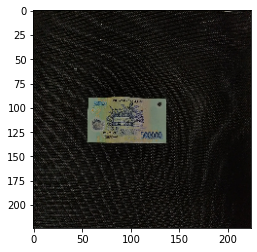

In [ ]:
images, labels = next(iter(train_ds.take(1)))
image = images[0].numpy().astype("uint8")  # *255 if image rescaled
plt.imshow(image)

In [ ]:
class_names = train_ds.class_names
print(class_names)

['1000', '10000', '100000', '2000', '20000', '200000', '5000', '50000', '500000']


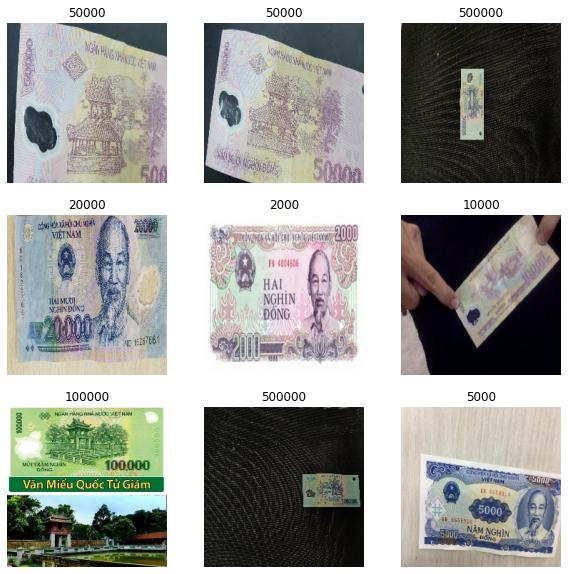

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8")) # *255 if image rescaled
    plt.title(class_names[labels[i]])
    plt.axis("off")

#Model

In [ ]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

In [ ]:
#base model
base_model = keras.applications.MobileNetV2(weights="imagenet",
                          input_shape=(224, 224, 3), 
                          include_top=False)
base_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
#Call_back 
earlystopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2,
    patience=10,
    verbose=1)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/gdrive/MyDrive/moneyheist_checkpoint.h5",
                                                 save_weights_only=False, # the whole model (False) or only weights (True) 
                                                 save_best_only=True, # keep the best model with lowest validation loss
                                                 monitor='val_loss',
                                                 verbose=1)
callbacks = [earlystopping_callback,checkpoint_callback]


In [ ]:
model = tf.keras.Sequential([
  resize_and_rescale,  
  data_augmentation,
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(9, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    callbacks = callbacks)

Epoch 1/10
43/43 [==============================] - 59s 1s/step - loss: 1.4541 - accuracy: 0.5244 - val_loss: 0.9089 - val_accuracy: 0.7456

Epoch 00001: val_loss improved from inf to 0.90892, saving model to /content/gdrive/MyDrive/moneyheist_checkpoint.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
43/43 [==============================] - 48s 936ms/step - loss: 0.6900 - accuracy: 0.8013 - val_loss: 0.6652 - val_accuracy: 0.8166

Epoch 00002: val_loss improved from 0.90892 to 0.66517, saving model to /content/gdrive/MyDrive/moneyheist_checkpoint.h5
Epoch 3/10
43/43 [==============================] - 45s 906ms/step - loss: 0.5227 - accuracy: 0.8493 - val_loss: 0.5380 - val_accuracy: 0.8639

Epoch 00003: val_loss improved from 0.66517 to 0.53803, saving model to /content/gdrive/MyDrive/moneyheist_checkpoint.h5
Epoch 4/10
43/43 [==============================] - 45s 898ms/step - loss: 0.4459 - accuracy: 0.8767 - val_loss: 0.4921 - val_accuracy: 0.8728

Epoch 00004: val_loss improved from 0.53803 to 0.49213, saving model to /content/gdrive/MyDrive/moneyheist_checkpoint.h5
Epoch 5/10
43/43 [==============================] - 45s 902ms/step - loss: 0.3816 - accuracy: 0.8996 - val_loss: 0.4400 - val_accuracy: 0.8876

Epoch 00005: val_loss improved from 0.49213 to 0.44003, savin

In [ ]:
# Unfreeze the base_model.
base_model.trainable = True

# Fine-tune from 
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 9)                 11529     
Total params: 2,269,513
Trainable params: 1,872,969
Non-trainable params: 396,544
______________________________________

In [ ]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=30,
                    callbacks = callbacks)

Epoch 1/30
43/43 [==============================] - 46s 919ms/step - loss: 0.0609 - accuracy: 0.9823 - val_loss: 0.1709 - val_accuracy: 0.9497

Epoch 00001: val_loss improved from 0.17386 to 0.17095, saving model to /content/gdrive/MyDrive/moneyheist_checkpoint.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
43/43 [==============================] - 46s 916ms/step - loss: 0.0515 - accuracy: 0.9852 - val_loss: 0.1677 - val_accuracy: 0.9527

Epoch 00002: val_loss improved from 0.17095 to 0.16770, saving model to /content/gdrive/MyDrive/moneyheist_checkpoint.h5
Epoch 3/30
43/43 [==============================] - 46s 918ms/step - loss: 0.0467 - accuracy: 0.9897 - val_loss: 0.1665 - val_accuracy: 0.9556

Epoch 00003: val_loss improved from 0.16770 to 0.16646, saving model to /content/gdrive/MyDrive/moneyheist_checkpoint.h5
Epoch 4/30
43/43 [==============================] - 46s 916ms/step - loss: 0.0446 - accuracy: 0.9911 - val_loss: 0.1667 - val_accuracy: 0.9556

Epoch 00004: val_loss did not improve from 0.16646
Epoch 5/30
43/43 [==============================] - 46s 918ms/step - loss: 0.0410 - accuracy: 0.9897 - val_loss: 0.1646 - val_accuracy: 0.9615

Epoch 00005: val_loss improved from 0.16646 to 0.16456, saving model to /content/gdrive/MyDrive/moneyheist_checkpoint.h5
Epoch 6/30

## Evaluate model 

In [ ]:
model.evaluate(val_ds)

11/11 [==============================] - 9s 202ms/step - loss: 0.1587 - accuracy: 0.9645


[0.15865561366081238, 0.9644970297813416]

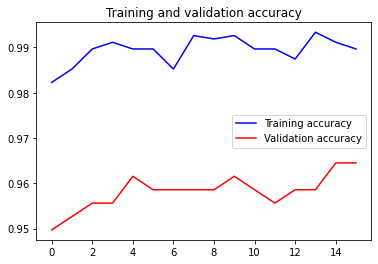

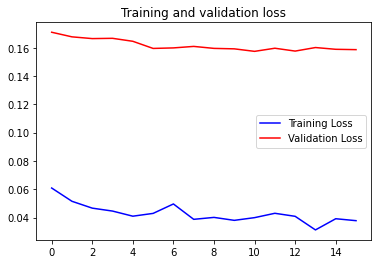

In [ ]:
acc_loss_graph(history)

#Predict a real photo

In [ ]:
classes = train_ds.class_names
print(classes)

['1000', '10000', '100000', '2000', '20000', '200000', '5000', '50000', '500000']


In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/moneyheist_checkpoint.h5')


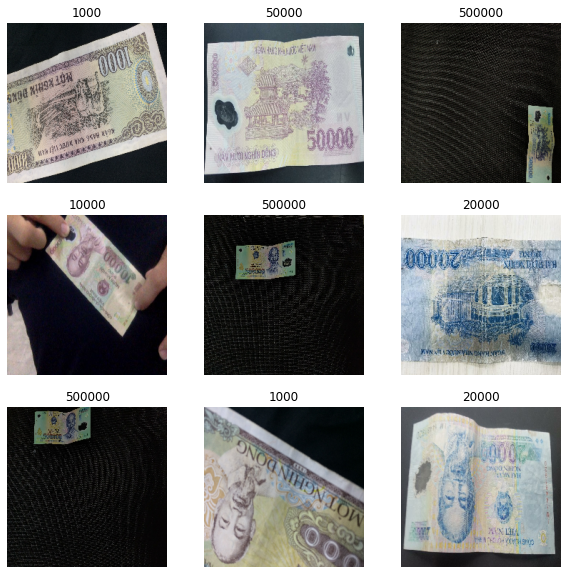

In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = val_ds.as_numpy_iterator().next()
predictions_2 = model.predict_on_batch(image_batch)

# YOUR CODE HERE
pred_indices = np.argmax(predictions_2, axis =1)

# Display photos with predictions
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(classes[pred_indices[i]])
  plt.axis("off")